## **1. Importing Functions**

In [1]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime, time, date
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the csv file
bar_accidents = pd.read_csv('accidents_2017.csv')
bar_accidents.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


## **2. Checking shape**

In [3]:
# checking the shape
bar_accidents.shape

(10339, 15)

## **3. Checking Info - data types**

In [4]:
# checking info
bar_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [5]:
# convert month to datetime
# bar_accidents.Month = bar_accidents.Month.apply(lambda x: parser.parse(x).month)

In [33]:
bar_accidents.head().sample(5).sample(5,axis = 1)

,Mild injuries,Serious injuries,Street,Month,Neighborhood Name
2,5,0,Litoral (Besòs) ...,December,Unknown
0,2,0,Número 27 ...,October,Unknown
3,1,0,Número 3 Zona Franca ...,July,Unknown
4,1,0,Las Navas de Tolosa ...,May,el Camp de l'Arpa del Clot
1,2,0,Número 3 Zona Franca / Número 50 Zona Franca ...,September,Unknown


## **4. Checking Unique Columns**

In [35]:
# checking unique columns
bar_accidents.columns.nunique()

16

## **5. Checking if any Null values**

In [8]:
# checking null values
bar_accidents.isna().any()

Id                   False
District Name        False
Neighborhood Name    False
Street               False
Weekday              False
Month                False
Day                  False
Hour                 False
Part of the day      False
Mild injuries        False
Serious injuries     False
Victims              False
Vehicles involved    False
Longitude            False
Latitude             False
dtype: bool

In [9]:
bar_acc_month= bar_accidents.loc[:, ['Month','Victims']].groupby('Month').sum()
bar_acc_month.head()

,Victims
Month,
April,936
August,803
December,898
February,942
January,991


In [10]:
bar_acc_month.Victims.sum()

12186

In [11]:
1212/12186

0.09945839487936976

## **6. Accident rate by Month - by %**

In [12]:
# percentage by month
bar_acc_month['% rate'] =  bar_acc_month['Victims']\
.transform(lambda x: str (round((x / bar_acc_month.Victims.sum() *100),2)) + str('%'))
bar_acc_month.head()

,Victims,% rate
Month,,
April,936,7.68%
August,803,6.59%
December,898,7.37%
February,942,7.73%
January,991,8.13%


## **6a. Number of Accident Victims by Month( Line graph)**

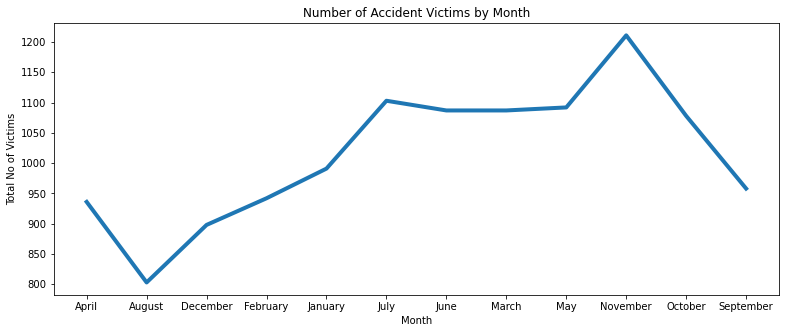

In [13]:
fig, ax = plt.subplots(figsize = (13,5))
ax.plot(bar_acc_month.index, bar_acc_month.Victims, linewidth = 4)
ax.set(title = 'Number of Accident Victims by Month', \
       xlabel = 'Month', ylabel = 'Total No of Victims');

## **6b. Number of Accident Victims by Month( bar)**

[Text(0.5, 1.0, 'Number of Accident Victims by Month (Bar chart)')]

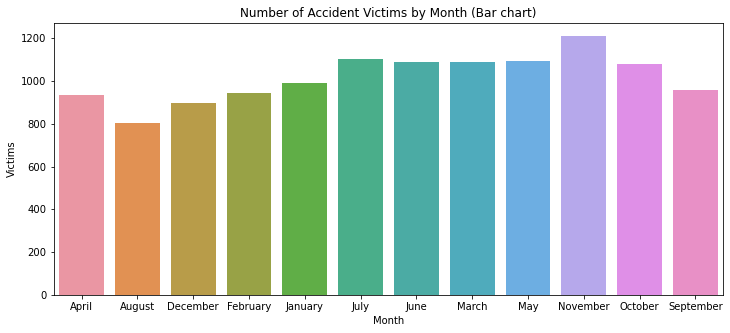

In [14]:
fig, ax = plt.subplots(figsize = (12,5))
sns.barplot(data = bar_acc_month, x = bar_acc_month.index , y = bar_acc_month['Victims'] )
ax.set(title = 'Number of Accident Victims by Month (Bar chart)')

## **7a. Accidents by part of day**

In [15]:
# what part of the morning has highest rates
bar_acc_pod = bar_accidents.loc[:, ['Part of the day','Victims']]\
.groupby('Part of the day').agg(['sum']).squeeze()
bar_acc_pod

Part of the day
Afternoon    6092
Morning      4712
Night        1382
Name: (Victims, sum), dtype: int64

<AxesSubplot:xlabel='Part of the day'>

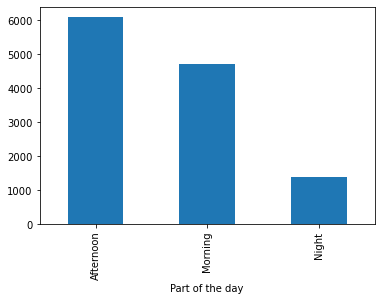

In [16]:
bar_acc_pod.plot(kind = 'bar' , \
            x = bar_acc_pod.index  , y = bar_acc_pod.values)

## **7b. Part of day - pie chart**

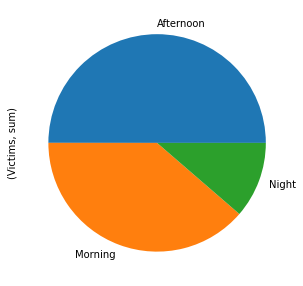

In [17]:
bar_acc_pod.plot(kind = 'pie' , x = bar_acc_pod.index\
, y = bar_acc_pod.values, figsize = (16,5));

## **8. Serious Injuries Occurence by District %**

In [18]:
district = bar_accidents.loc[:, ['District Name','Mild injuries','Serious injuries','Victims']]
dist_check = district.groupby('District Name').agg(['sum'])
dist_check.head()

,Mild injuries,Serious injuries,Victims
,sum,sum,sum
District Name,,,
Ciutat Vella,623,11,634
Eixample,3499,60,3562
Gràcia,576,12,588
Horta-Guinardó,827,10,839
Les Corts,865,27,894


## **8b. line graph comparing injuries**

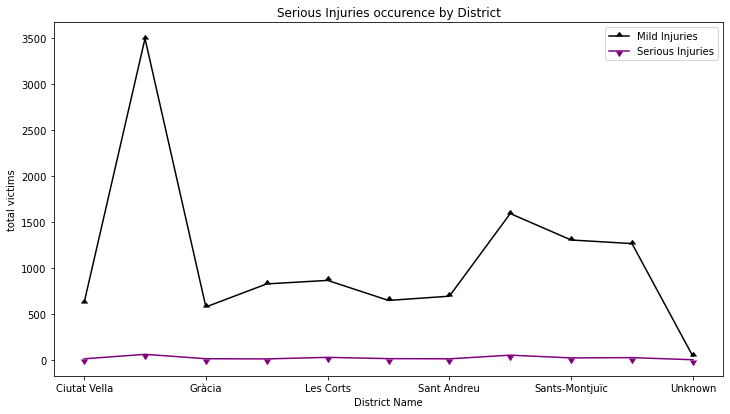

In [19]:
fig,ax = plt.subplots(figsize = (12,6.5))
a = dist_check['Mild injuries'].rename({'sum':'Mild Injuries'},axis =1).plot(ax=ax, marker=10, color ='black')
b = dist_check['Serious injuries'].rename({'sum':'Serious Injuries'},axis =1).plot(ax=ax, marker=11, color = 'purple')
ax.set(title = 'Serious Injuries occurence by District', ylabel = 'total victims')
ax.legend(loc = 'upper right', );

## **9. lets compute correleation between Hour and accident victim numbers` %**

In [20]:
#slicing the part we need
tod_v = bar_accidents.loc[:, ['Hour','Victims']]
tod_v.head()

,Hour,Victims
0,8,2
1,13,2
2,21,5
3,2,1
4,14,1


# **10. Checking corelations coefficient**

In [21]:
# check
tod_v['Hour'].corr(tod_v['Victims'])
# 0.04 % is very insignificant

0.040177174581460355

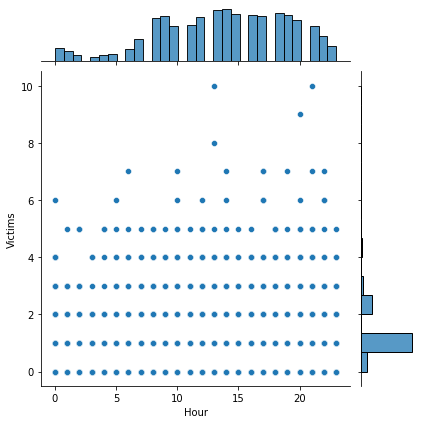

In [22]:
sns.jointplot(data = tod_v, x = tod_v.Hour , y = tod_v.Victims, kind= 'scatter');

In [23]:
# convert the month to integer representation
bar_accidents ['Month_int'] = bar_accidents['Month'].apply(lambda x: parser.parse(x).month)

In [24]:
bar_accidents.loc[:, ['Month_int','Victims']]

,Month_int,Victims
0,10,2
1,9,2
2,12,5
3,7,1
4,5,1
...,...,...
10334,4,1
10335,3,1
10336,12,1
10337,7,1


In [25]:
m_v = bar_accidents.loc[:, ['Month_int','Victims']]

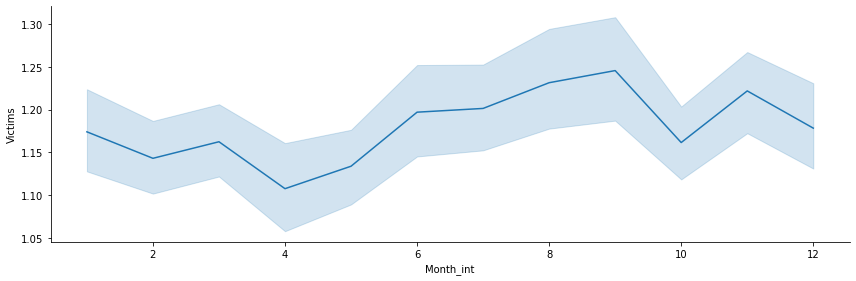

In [26]:
# plotting on time series month vs # of victims
sns.relplot(data = m_v, x = m_v['Month_int'],\
            y = m_v['Victims'] , kind = 'line', height = 4, aspect = 3)

# **11. Frequency of Accident vistims by day**

In [27]:
# frequency of occurence by hour of day
#slicing the part we need
tod_v = bar_accidents.loc[:, ['Hour','Victims']]
tod_v.head()

,Hour,Victims
0,8,2
1,13,2
2,21,5
3,2,1
4,14,1


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

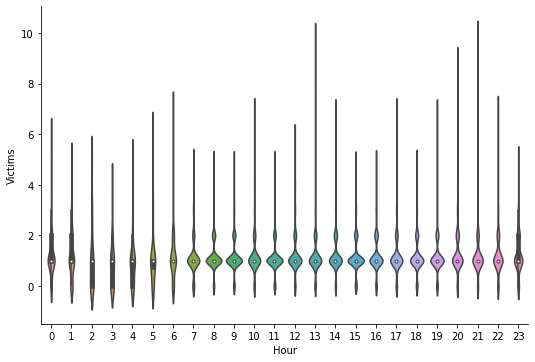

In [28]:
sns.catplot(data = tod_v, x =tod_v.Hour\
            , y =tod_v.Victims,  height = 5, aspect = 1.5, kind ='violin')